# Dados e Aprendizagem Automática
## Previsão eficiência do sono


**Dataset:** .xlsx

**Link** https://www.kaggle.com/datasets/vijaysubhashp/employee-burnout-prediction?rvi=1

**Problema:** Prever eficiência do sono.
___
**Features do Dataset:**

___
**Grupo:**
- João Paulo Machado Abreu - pg53928
- João Pedro Dias Faria - pg53939
- Ricardo Cardoso Sousa - pg54179
- Rui Pedro Guise da Silva - pg54213


## Importes e compreensão dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone

Ler excel

In [2]:
df = pd.read_excel('./datasets/grupo/Burnout.xlsx')
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


Podemos verificar que este dataset é contem apenas 22750 entradas para 9 atributos.

In [3]:
df.shape

(22750, 9)

O dataset tem 4 atributos numéricos,

É possivel identificar a preseça de valores nulos em:
*  Resource Allocation
*  Mental Fatigue Score
*  Burn Rate

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [6]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


O objetivo de trabalhar com este dataset é identificar o burn rate, sendo a label um valor continuo compreendido entre 0 e 1.

## Exploração e preparação de dados

### Missing values

<Axes: >

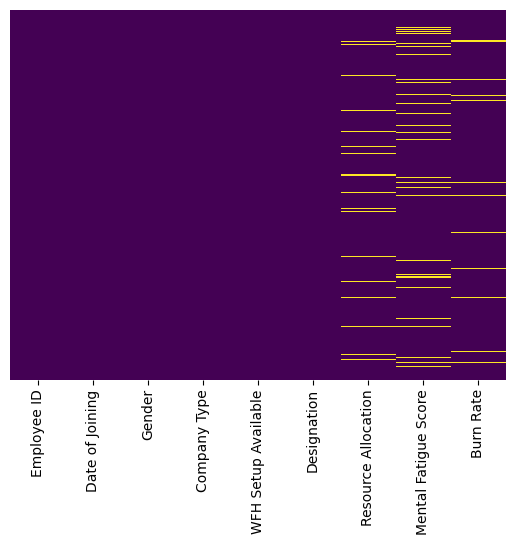

In [7]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

Função para preencher os valores nulos com 0.

In [8]:
def fill_with_zeros(data,columns):
    data = df
    
    data[columns] = data[columns].fillna(0)
    
    return data

In [9]:
df.dropna(subset=['Burn Rate'],inplace=True)

In [10]:
df=fill_with_zeros(df,['Resource Allocation','Mental Fatigue Score'])

<Axes: >

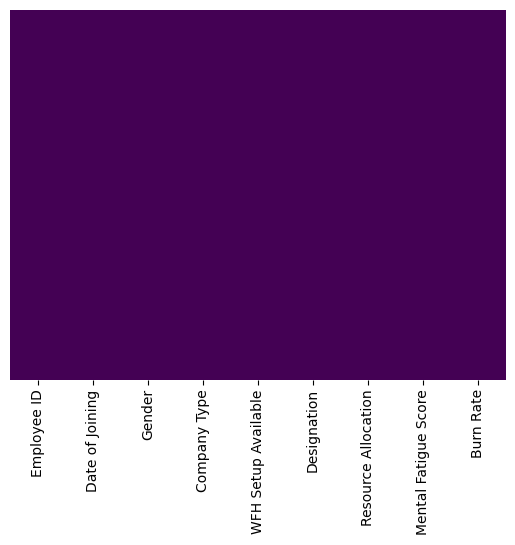

In [11]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### Duplicados

In [12]:
df.duplicated().sum()

0

### Drop

In [13]:
df.drop(['Employee ID'], axis = 1, inplace = True)

### Categoric data

In [14]:
'''
data_r3 = df.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(data_r3['Gender'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()
'''

"\ndata_r3 = df.copy()\n\nfrom sklearn.preprocessing import LabelBinarizer\n\nlb = LabelBinarizer()\nlb_results = lb.fit_transform(data_r3['Gender'])\nlb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)\n\nlb_results_df.head()\n"

Gender

In [15]:
df_v1 = df.copy()
gender_mapper = {'Male':0, 'Female':1}
df_v1['Gender'] = df_v1['Gender'].replace(gender_mapper)
df_v1 = df_v1.join(pd.get_dummies(df_v1['Gender'], prefix='Gender').astype(int))
df_v1.rename(columns={'Gender_0':'Male','Gender_1':'Female'},inplace=True)
df_v1.drop(['Gender'], axis = 1, inplace = True)
df_v1.head()

,Date of Joining,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Male,Female
0,2008-09-30,Service,No,2,3.0,3.8,0.16,0,1
1,2008-11-30,Service,Yes,1,2.0,5.0,0.36,1,0
2,2008-03-10,Product,Yes,2,0.0,5.8,0.49,0,1
3,2008-11-03,Service,Yes,1,1.0,2.6,0.20,1,0
4,2008-07-24,Service,No,3,7.0,6.9,0.52,0,1


WFH Setup Available

In [16]:
workplace_mapper = {'No':0, 'Yes':1}
df_v1['WFH Setup Available'] = df_v1['WFH Setup Available'].replace(workplace_mapper)
df_v1 = df_v1.join(pd.get_dummies(df_v1['WFH Setup Available'], prefix='WFH Setup Available').astype(int))
df_v1.rename(columns={'WFH Setup Available_0':'Office','WFH Setup Available_1':'Home'},inplace=True)
df_v1.drop(['WFH Setup Available'], axis = 1, inplace = True)
df_v1.head()

,Date of Joining,Company Type,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Male,Female,Office,Home
0,2008-09-30,Service,2,3.0,3.8,0.16,0,1,1,0
1,2008-11-30,Service,1,2.0,5.0,0.36,1,0,0,1
2,2008-03-10,Product,2,0.0,5.8,0.49,0,1,0,1
3,2008-11-03,Service,1,1.0,2.6,0.20,1,0,0,1
4,2008-07-24,Service,3,7.0,6.9,0.52,0,1,1,0


Company Type

In [17]:
df_v1['Company Type'].nunique()

2

In [18]:
company_mapper = {'Service':0, 'Product':1}
df_v1['Company Type'] = df_v1['Company Type'].replace(company_mapper)
df_v1 = df_v1.join(pd.get_dummies(df_v1['Company Type'], prefix='Company Type').astype(int))
df_v1.rename(columns={'Company Type_0':'Service','Company Type_1':'Product'},inplace=True)
df_v1.drop(['Company Type'], axis = 1, inplace = True)
df_v1.head()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Male,Female,Office,Home,Service,Product
0,2008-09-30,2,3.0,3.8,0.16,0,1,1,0,1,0
1,2008-11-30,1,2.0,5.0,0.36,1,0,0,1,1,0
2,2008-03-10,2,0.0,5.8,0.49,0,1,0,1,0,1
3,2008-11-03,1,1.0,2.6,0.20,1,0,0,1,1,0
4,2008-07-24,3,7.0,6.9,0.52,0,1,1,0,1,0


### Handling dates

In [19]:
df_v1['Date of Joining'].head()

0   2008-09-30
1   2008-11-30
2   2008-03-10
3   2008-11-03
4   2008-07-24
Name: Date of Joining, dtype: datetime64[ns]

In [20]:
df_v1['year_of_joining'] = df_v1['Date of Joining'].dt.year

In [21]:
df_v1['month_of_joining'] = df_v1['Date of Joining'].dt.month
df_v1['day_of_joining'] = df_v1['Date of Joining'].dt.day

In [22]:
df_v1.nunique()

Date of Joining         366
Designation               6
Resource Allocation      11
Mental Fatigue Score    101
Burn Rate               101
Male                      2
Female                    2
Office                    2
Home                      2
Service                   2
Product                   2
year_of_joining           1
month_of_joining         12
day_of_joining           31
dtype: int64

In [24]:
df_v1.drop(['Date of Joining','year_of_joining'], axis = 1, inplace = True)

### Exploraty Data Analysis

<Axes: >

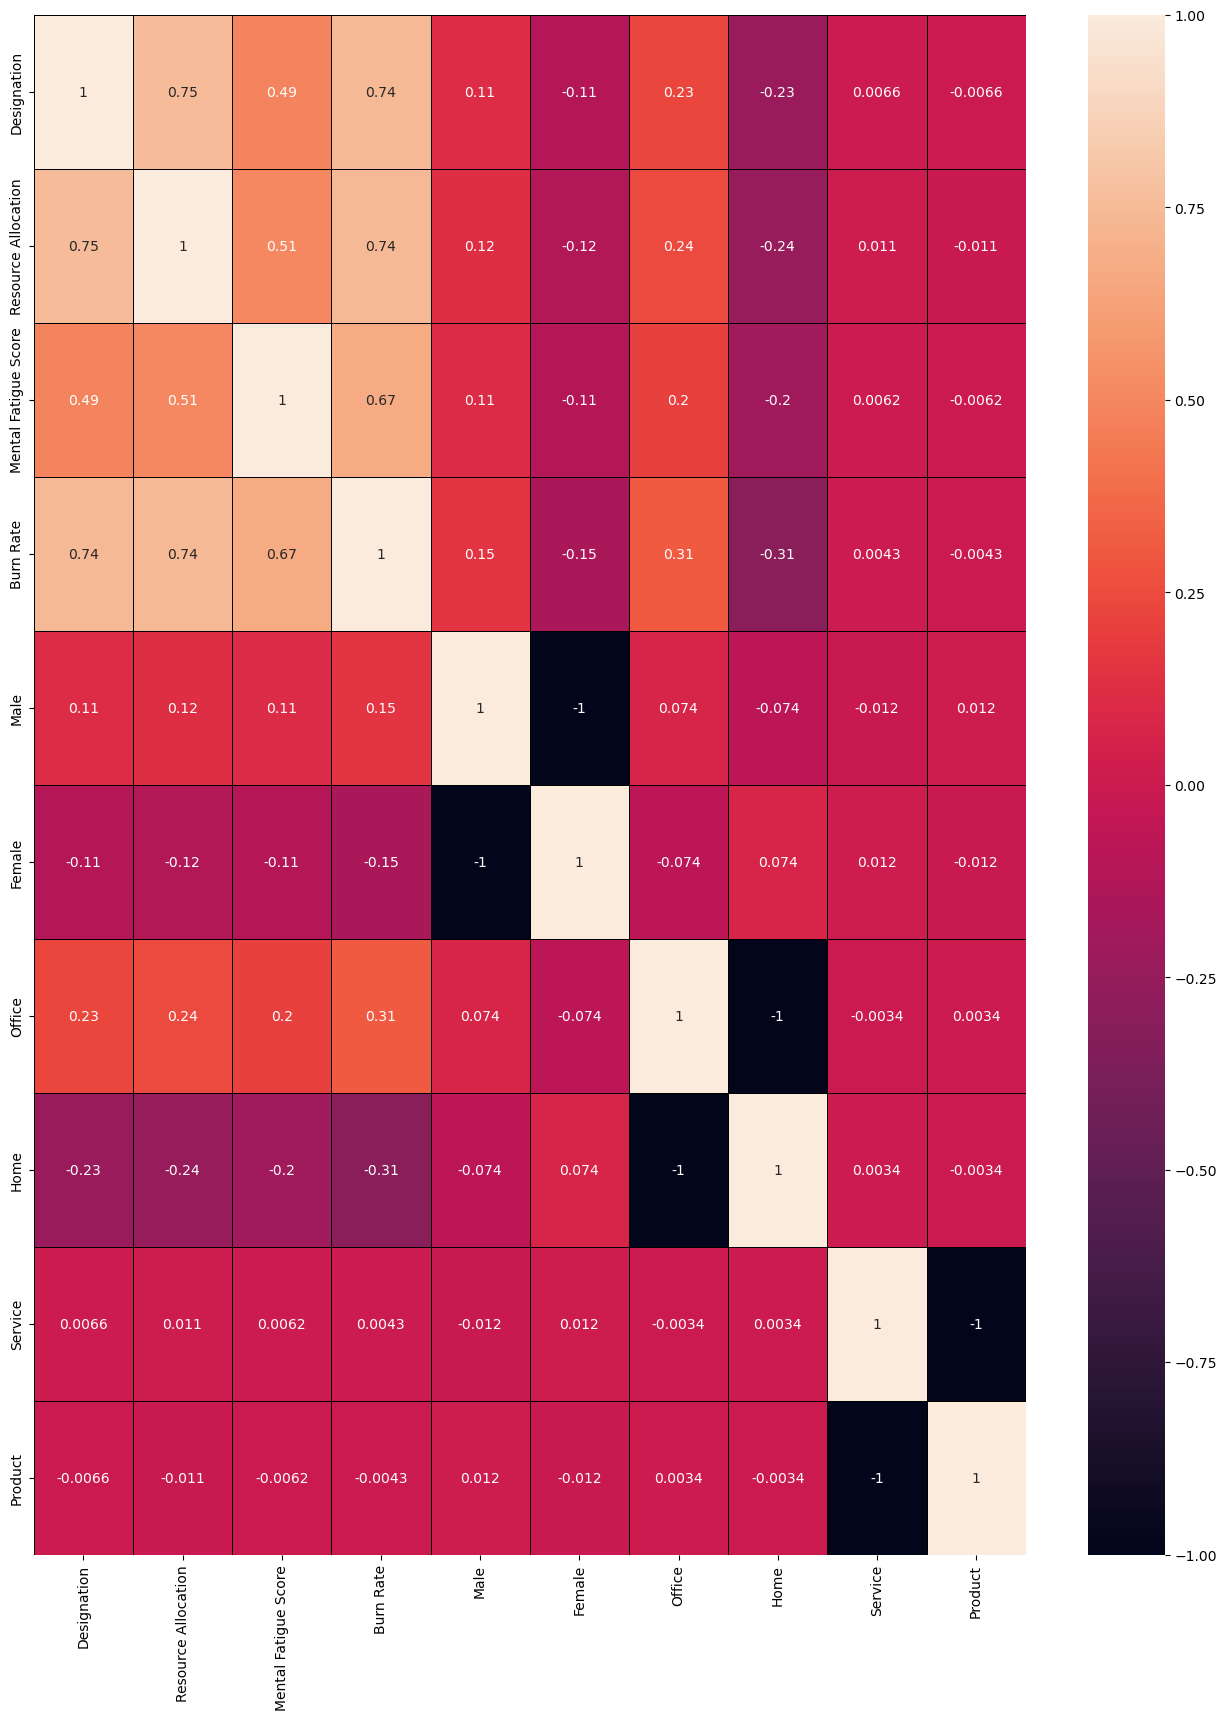

In [28]:
fig = plt.figure(figsize = (16,20))
incidents_corr = df_v1.corr(method = 'pearson')
sns.heatmap(incidents_corr, linecolor='black', linewidth=0.5,annot=True)

In [27]:
df_v1.drop(['month_of_joining','day_of_joining'], axis = 1, inplace = True)

<Axes: xlabel='WFH Setup Available', ylabel='count'>

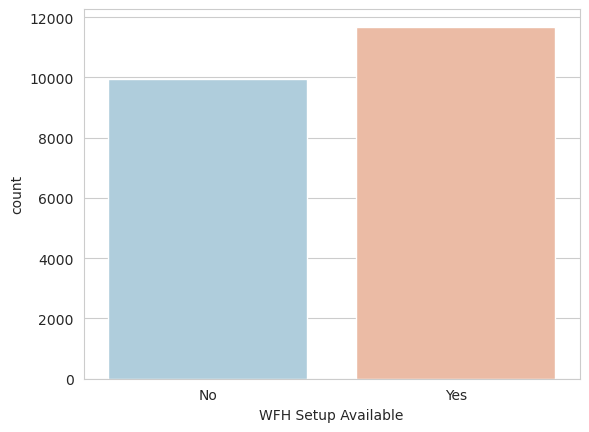

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='WFH Setup Available',data=df,palette='RdBu_r')

<Axes: xlabel='Burn Rate', ylabel='Count'>

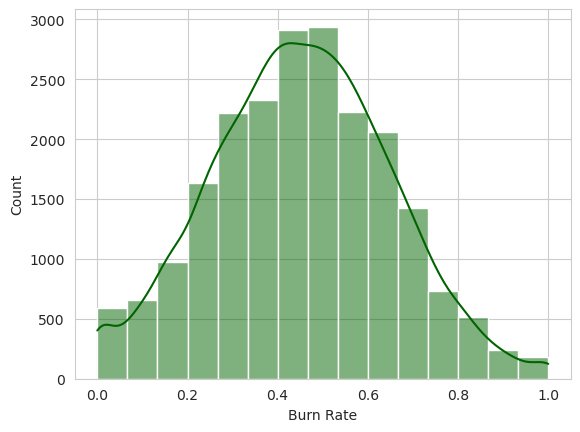

In [39]:
sns.histplot(df_v1['Burn Rate'],bins=15,color='darkgreen',kde=True)

Text(0.5, 1.0, 'Mental Fatigue Score')

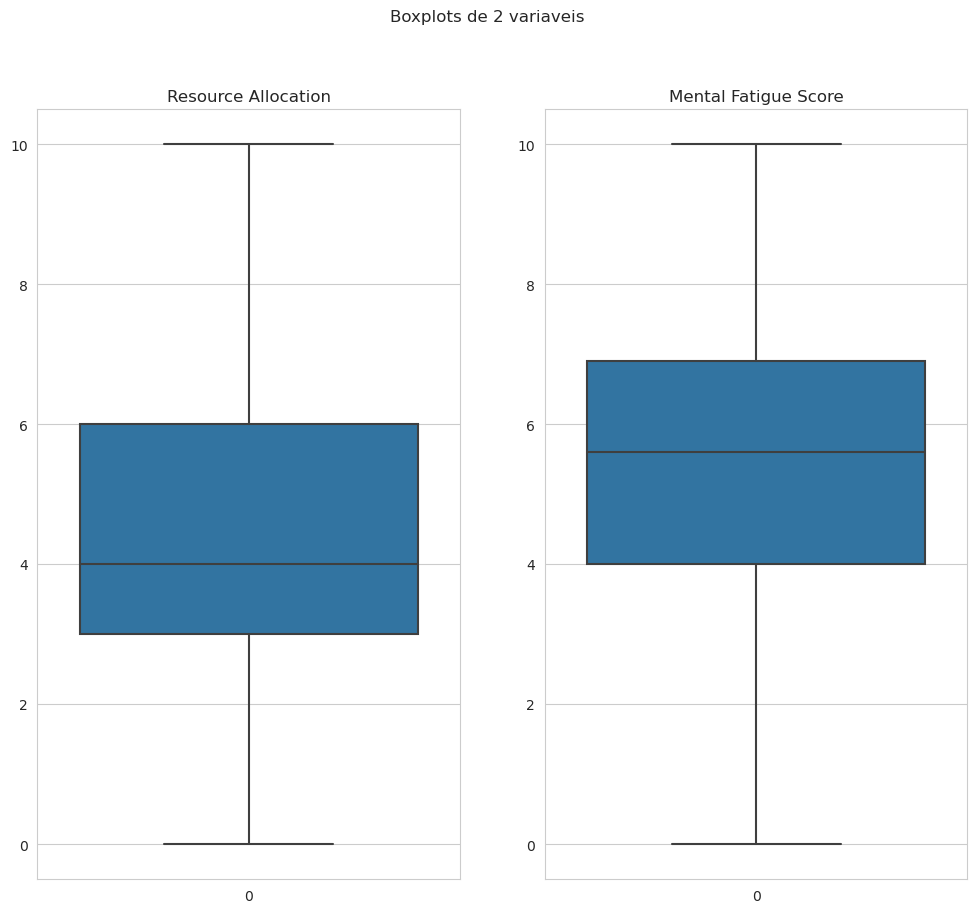

In [50]:
fig,axs=plt.subplots(1,2,figsize=(12,10))
fig.suptitle('Boxplots de 2 variaveis')
sns.boxplot(data=df['Resource Allocation'],ax=axs[0])
axs[0].set_title('Resource Allocation')
sns.boxplot(data=df['Mental Fatigue Score'],ax=axs[1])
axs[1].set_title('Mental Fatigue Score')

<Axes: >

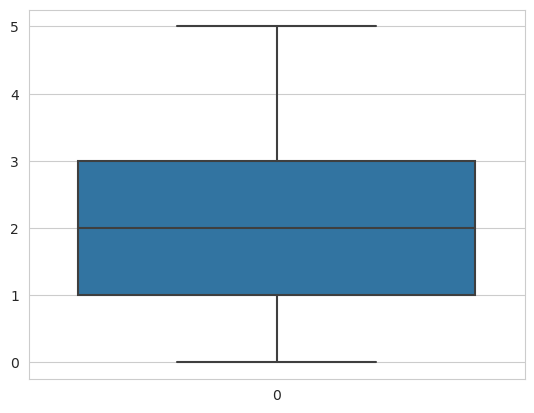

In [51]:
sns.boxplot(data=df['Designation'])

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


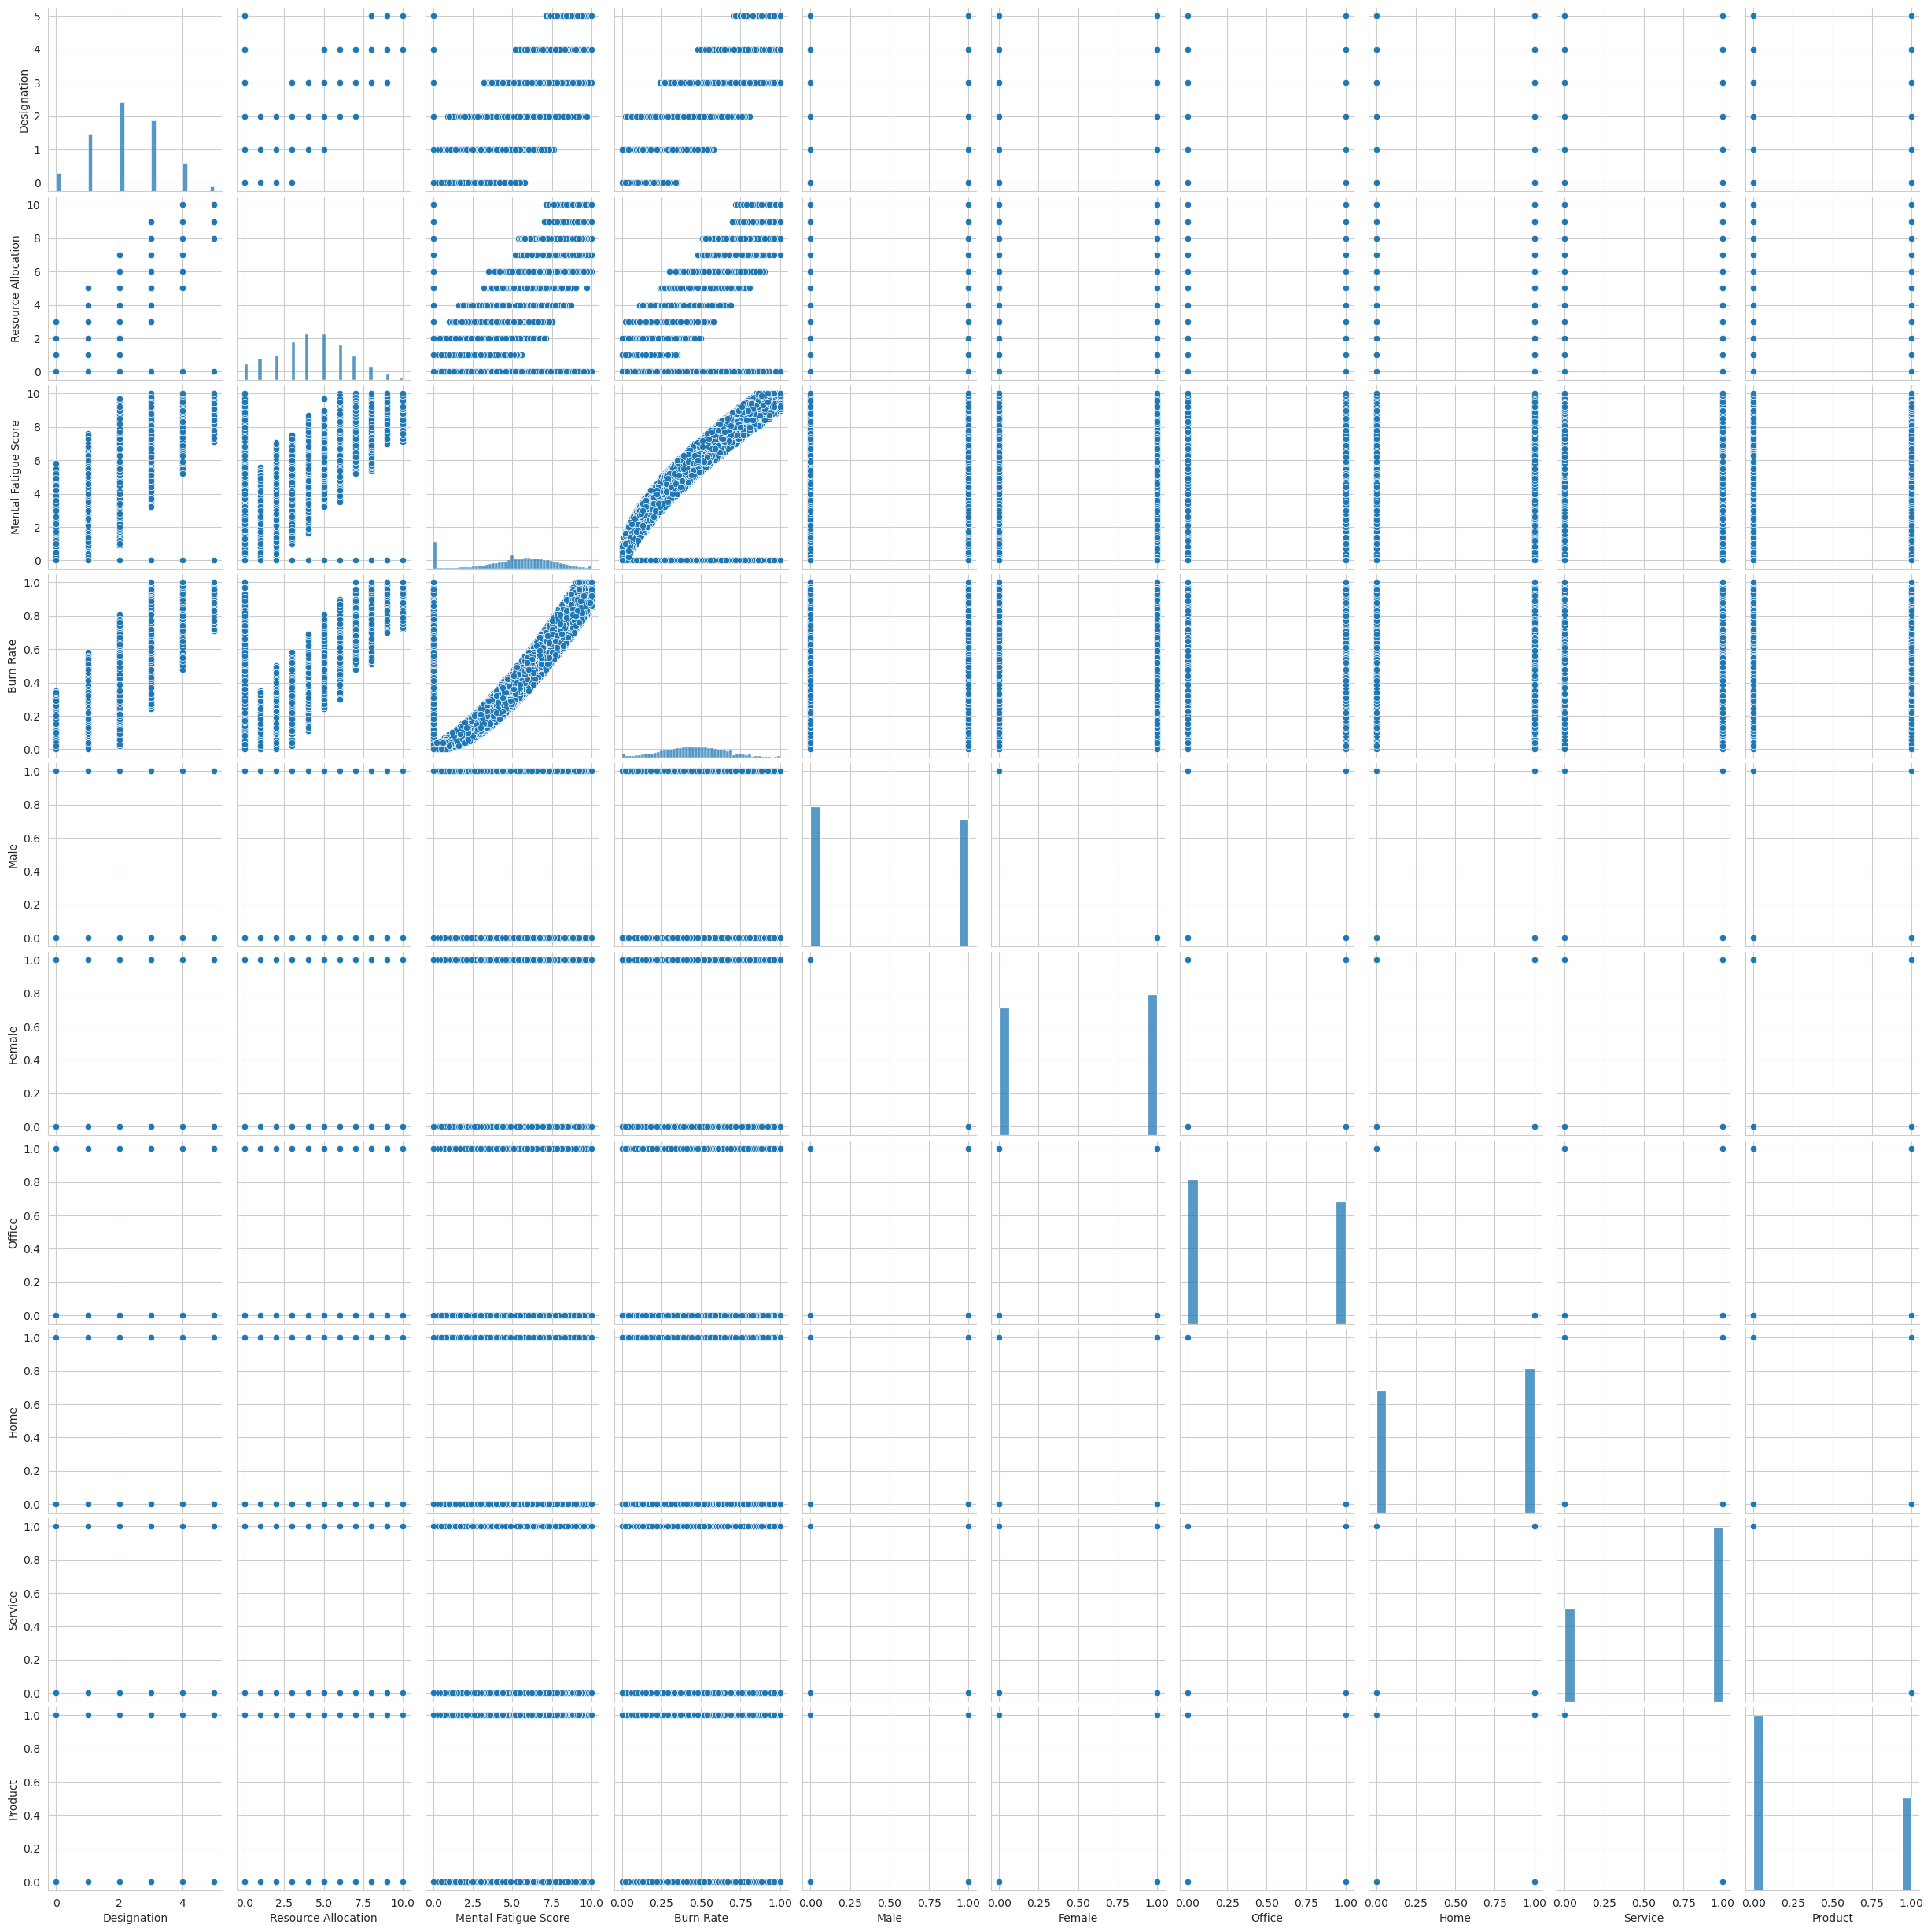

In [47]:
#pair_plot=sns.pairplot(df_v1)
#pair_plot.savefig('burnratepairplot.png')

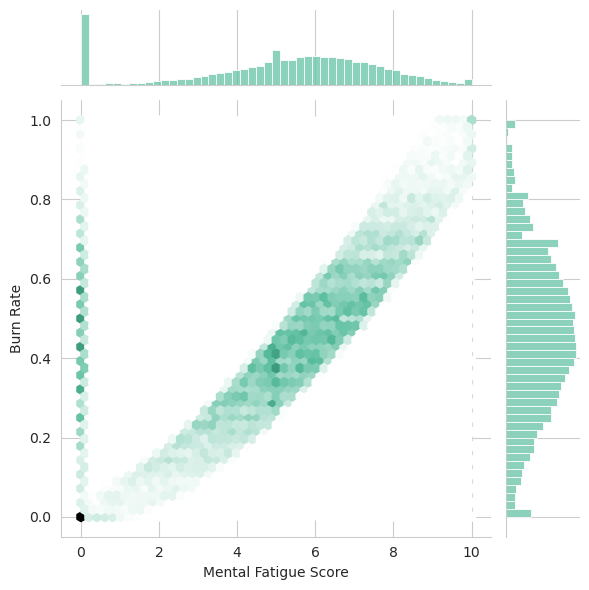

In [80]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.jointplot(x='Mental Fatigue Score',y='Burn Rate',data=df_v1,kind="hex")

## Model conception (Model)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Dados de treino e de teste

In [82]:
X = df_v1.drop(['Burn Rate'], axis=1)
y = df_v1['Burn Rate']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


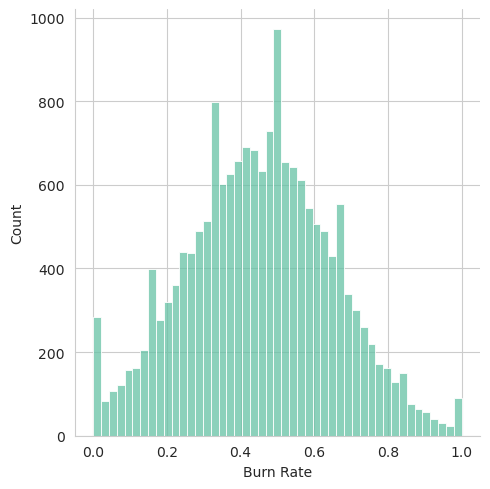

In [87]:
sns.displot(y_train)

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


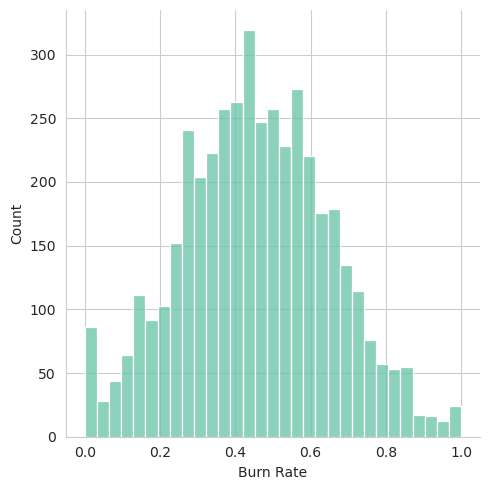

In [85]:
sns.displot(y_test)